# R5.A.12 & R5.B.10 - Modélisation Mathématique - TP 05 
_Antoine Nongaillard 2024–2025_

La __régression linéaire__ est sans aucun doute l’algorithme de __Machine Learning (ML)__ le plus simple qui soit. Comme tous les algorithmes de ML, il est instancié à partir d’exemples, et permet ensuite de généraliser à de nouvelles données. Ce modèle est suffisamment simple pour qu’une solution mathématique immédiate existe dans tous les cas. Il «suffit» de _calibrer le modèle_ et non de l’_entraîner_ comme avec les réseaux de neurones ou les approches basées sur
l’apprentissage par renforcement.

En guise d’illustration on prendra ici un exemple trivial avec quelques données, qui pourraient par exemple correspondre à prédiction du poids d’un individu à partir de sa taille, la température en fonction de l’altitude, ou les ventes d’un produit en fonction de sa qualité.

Toutes les méthodes du framework que nous allons utiliser, __ScikitLearn__, fonctionnent avec des `np.array`. 

La technique d’utilisation est toujours la même :

1. récupérer les données sous forme de `np.array`
2. créer un modèle
3. calibrer ce modèle avec la méthode `fit(...)`
4. généraliser (faire des prédictions) avec la méthode `predict(...)`

In [20]:
# imports 
# exo 1
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , root_mean_squared_error
import matplotlib.pyplot as plt
# exo 2
from sklearn.preprocessing import PolynomialFeatures
# exo 3
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
# chemins
chemin='data/'

# Exercice 1 : Une première regression linéaire

__Q1.__ Mettez en forme les observations $(x_i, y_i)$ suivantes afin qu’elles soient utilisables : 

        (5, 5), (15,20), (25, 14), (35, 32), (45, 22), (55, 38)
        
Affichez-les comme nuage de points sur une grille.

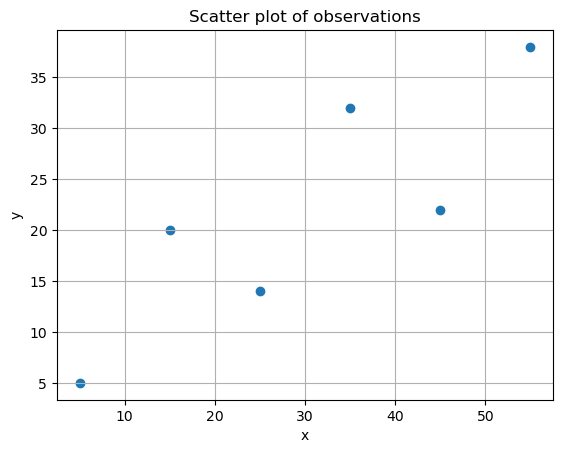

In [21]:
# Define the observations
observations = np.array([[5, 5], [15, 20], [25, 14], [35, 32], [45, 22], [55, 38]])

# Separate the observations into x and y coordinates
x = observations[:, 0]
y = observations[:, 1]

# Plot the observations as a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of observations')
plt.grid(True)
plt.show()

__Q2.__ Créez le modèle de régression qui représente le mieux ces observations, c’est-à-dire la droite minimisant l’écart avec les points.

Coefficient: 0.54
Intercept: 5.633333333333329


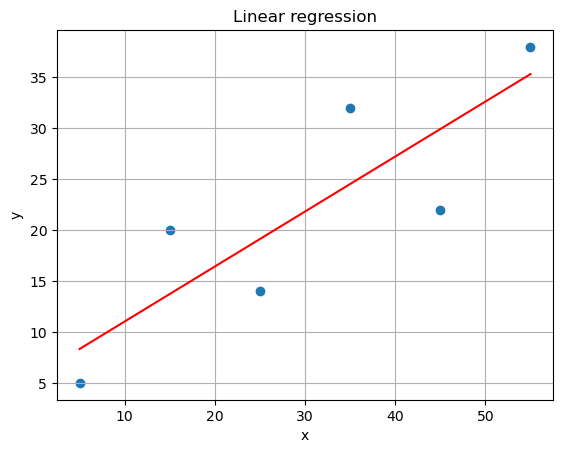

In [22]:
# Reshape x to be a 2D array
x_reshaped = x.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
# The .fit method is used to train the machine learning model on the provided data.
# It takes two arguments:
# - X: The input data (features) that the model will learn from.
# - y: The target data (labels) that the model will try to predict.
# During the fitting process, the model adjusts its internal parameters to minimize the difference
# between its predictions and the actual target values in y.
# In this case, 'x_reshaped' is the input data and 'y' is the target data.
model.fit(x_reshaped, y)

# Print the coefficients
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# Make predictions
y_predicted = model.predict(x_reshaped)
plt.plot(x, y_predicted, color='r')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression')
plt.grid(True)
plt.show()

__Q3.__ Quel est l’équation de la droite obtenue ainsi ? Autrement dit, quelles sont les valeurs de la pente et de l’ordonnée à l’origine ?

In [23]:
# Calculate the mean squared error
coefficient = model.coef_[0]
# The intercept is the value of y when x is 0
intercept = model.intercept_

print(f"L'équation de la droite est : y = {coefficient:.2f}x + {intercept:.2f}")

L'équation de la droite est : y = 0.54x + 5.63


__Q4.__ Puisque nous disposons d’un modèle, effectuons quelques prédictions. Quelles sont les valeurs prédites pour $x_1 = 20$ et $x_2 =40$ ?

In [24]:
# Define the new observations
new_observations = np.array([[20], [40]])

# Make predictions
predictions = model.predict(new_observations)

# Print the predictions
print(f"Predicted value for x_1 = 20: {predictions[0]}")
print(f"Predicted value for x_2 = 40: {predictions[1]}")

Predicted value for x_1 = 20: 16.43333333333333
Predicted value for x_2 = 40: 27.23333333333333


__Q5.__ Tracez la droite de régression ainsi que le nuage de points. Vérifiez que vous retrouvez bien les valeurs prédites pour les nouvelles observations données précédemment.

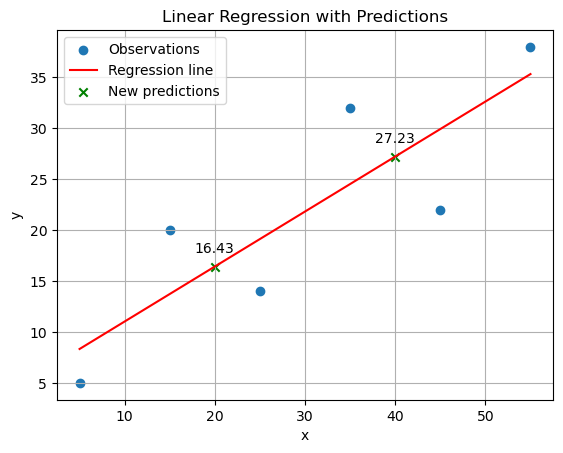

In [25]:
# Plot the original observations as a scatter plot
plt.scatter(x, y, label='Observations')

# Plot the regression line
plt.plot(x, y_predicted, color='r', label='Regression line')

# Plot the new observations and their predicted values
plt.scatter(new_observations, predictions, color='g', marker='x', label='New predictions')

# Annotate the new predictions
for i, txt in enumerate(predictions):
  plt.annotate(f'{txt:.2f}', (new_observations[i], predictions[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Predictions')
plt.legend()
plt.grid(True)
plt.show()

__Q6.__ Quantifiez la qualité du modèle en affichant les scores R2, MSE, RMSE et MAE. 

# Exercice 2 : Le cas polynomial
La régression polynomiale se gère de la même manière que la régression linéaire, mais avec une étape supplémentaire. Il est en effet nécessaire de transformer le tableau des entrées pour inclure des termes non linéaires.

__Q1.__ Mettez en forme les observations $(x_i, y_i)$ suivantes afin qu’elles soient utilisables : 

        (5, 15), (15, 11), (25, 2), (35, 8), (45, 25), (55, 32)

Affichez-les comme nuage de points sur une grille.

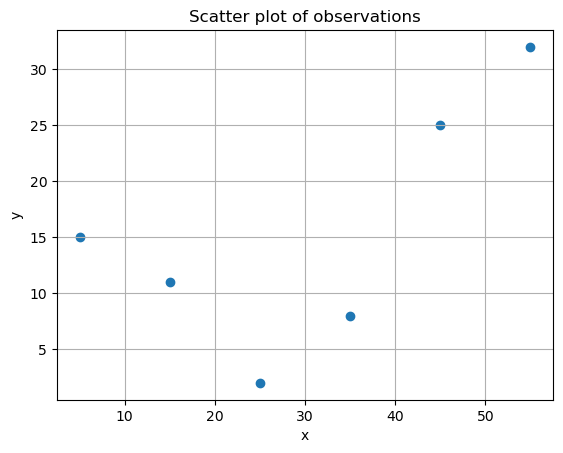

In [26]:
# Define the observations
observations_poly = np.array([[5, 15], [15, 11], [25, 2], [35, 8], [45, 25], [55, 32]])

# Separate the observations into x and y coordinates
x_poly = observations_poly[:, 0]
y_poly = observations_poly[:, 1]

# Plot the observations as a scatter plot
plt.scatter(x_poly, y_poly)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of observations')
plt.grid(True)
plt.show()



__Q2.__ Créez le modèle de régression et calibrez-le avec les données précédentes.

Coefficients: [ 0.         -1.32357143  0.02839286]
Intercept: 21.372321428571432


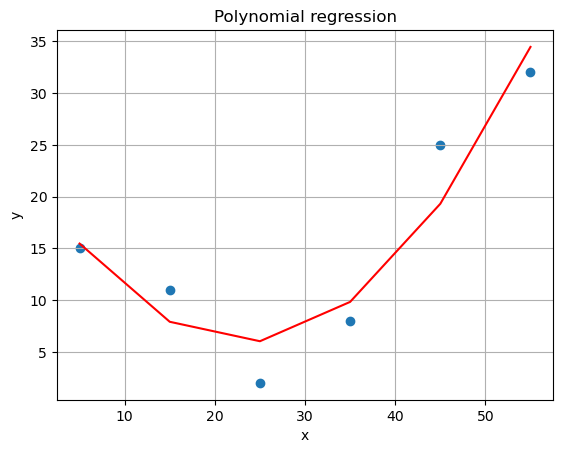

In [27]:
# Transform the input data to include polynomial terms
poly_features = PolynomialFeatures(degree=2)
x_poly_reshaped = x_poly.reshape(-1, 1)
x_poly_transformed = poly_features.fit_transform(x_poly_reshaped)

# Create and fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly_transformed, y_poly)

# Print the coefficients
print(f'Coefficients: {poly_model.coef_}')
print(f'Intercept: {poly_model.intercept_}')

# Make predictions
y_poly_predicted = poly_model.predict(x_poly_transformed)
plt.plot(x_poly, y_poly_predicted, color='r')
plt.scatter(x_poly, y_poly)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial regression')
plt.grid(True)
plt.show()

__Q3.__ Puisque nous disposons d’un modèle, effectuons quelques prédictions. Quelles sont les valeurs prédites pour $x_1 =
20$ et $x_2 =40$?

In [28]:
# Define the new observations for polynomial regression
new_observations_poly = np.array([[20], [40]])

# Transform the new observations to include polynomial terms
new_observations_poly_transformed = poly_features.transform(new_observations_poly)

# Make predictions
predictions_poly = poly_model.predict(new_observations_poly_transformed)

# Print the predictions
print(f"Predicted value for x_1 = 20: {predictions_poly[0]}")
print(f"Predicted value for x_2 = 40: {predictions_poly[1]}")

Predicted value for x_1 = 20: 6.258035714285636
Predicted value for x_2 = 40: 13.858035714285705


__Q4.__ Affichez les coefficients du polynôme, puis calculez les scores R2, MSE, RMSE et MAE afin d’évaluer la qualité du
modèle.

In [29]:
# Calculate the R2 score
r2 = r2_score(y_poly, y_poly_predicted)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_poly, y_poly_predicted)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_poly, y_poly_predicted)

# Print the scores
# The R2 score is a measure of how well the model fits the data. It ranges from 0 to 1, with 1 indicating a perfect fit.
print(f"R2 score: {r2:.2f}")
# The MSE is a measure of the average squared difference between the predicted values and the actual values. The lower the value, the better the model.
print(f"MSE: {mse:.2f}")
# The RMSE is the square root of the MSE. It provides a measure of the average difference between the predicted values and the actual values. The lower the value, the better the model.
print(f"RMSE: {rmse:.2f}")
# The MAE is a measure of the average absolute difference between the predicted values and the actual values. The lower the value, the better the model.
print(f"MAE: {mae:.2f}")

R2 score: 0.89
MSE: 11.31
RMSE: 3.36
MAE: 2.93


__Q5.__ Affichez les données initiales ainsi que le polynôme calculé.

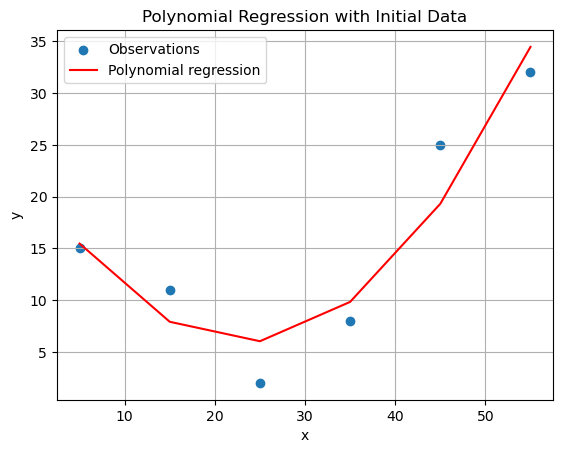

In [30]:
# Plot the original observations as a scatter plot
plt.scatter(x_poly, y_poly, label='Observations')

# Plot the polynomial regression line
plt.plot(x_poly, y_poly_predicted, color='r', label='Polynomial regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Initial Data')
plt.legend()
plt.grid(True)
plt.show()


__Q6.__ Malheureusement, vous n’avez que quelques points pour établir votre modèle.
 
__Q6.1.__ Récupérez le fichier `data_mm05_additional.csv`. Incorporez ces nouvelles données et évaluez la précision de votre modèle avec ces nouvelles données (R2, MSE, RMSE, MAE). Affichez finalement tous les points et le polynôme de régression.

R2 score (combined): 0.34
MSE (combined): 81.75
RMSE (combined): 9.04
MAE (combined): 7.40


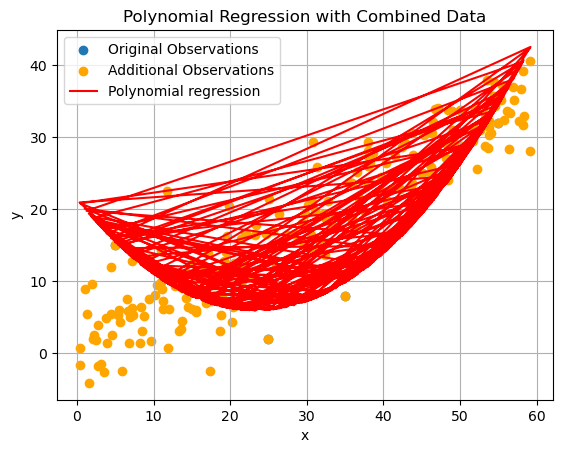

In [31]:
# Load the additional data
additional_data = pd.read_csv(chemin + 'data_mm05_additional.csv')

# Separate the additional data into x and y coordinates
x_additional = additional_data.iloc[:, 0].values
y_additional = additional_data.iloc[:, 1].values

# Combine the original and additional data
x_combined = np.concatenate((x_poly, x_additional))
y_combined = np.concatenate((y_poly, y_additional))

# Transform the combined input data to include polynomial terms
x_combined_reshaped = x_combined.reshape(-1, 1)
x_combined_transformed = poly_features.fit_transform(x_combined_reshaped)

# Make predictions with the combined data
y_combined_predicted = poly_model.predict(x_combined_transformed)

# Calculate the R2 score
r2_combined = r2_score(y_combined, y_combined_predicted)

# Calculate the Mean Squared Error (MSE)
mse_combined = mean_squared_error(y_combined, y_combined_predicted)

# Calculate the Root Mean Squared Error (RMSE)
rmse_combined = np.sqrt(mse_combined)

# Calculate the Mean Absolute Error (MAE)
mae_combined = mean_absolute_error(y_combined, y_combined_predicted)

# Print the scores
print(f"R2 score (combined): {r2_combined:.2f}")
print(f"MSE (combined): {mse_combined:.2f}")
print(f"RMSE (combined): {rmse_combined:.2f}")
print(f"MAE (combined): {mae_combined:.2f}")

# Plot the original and additional observations as a scatter plot
plt.scatter(x_poly, y_poly, label='Original Observations')
plt.scatter(x_additional, y_additional, label='Additional Observations', color='orange')

# Plot the polynomial regression line
plt.plot(x_combined, y_combined_predicted, color='r', label='Polynomial regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Combined Data')
plt.legend()
plt.grid(True)
plt.show()

__Q6.2.__ Trouvez un nouveau modèle si nécessaire qui obtiendrait de meilleurs résultats. 

R2 score (combined, degree 3): 0.85
MSE (combined, degree 3): 18.07
RMSE (combined, degree 3): 4.25
MAE (combined, degree 3): 3.28


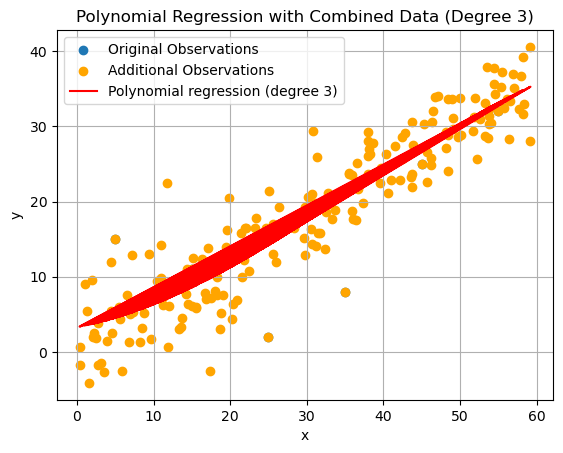

In [32]:
# Transform the input data to include polynomial terms of degree 3
poly_features_degree_3 = PolynomialFeatures(degree=3)
x_combined_transformed_degree_3 = poly_features_degree_3.fit_transform(x_combined_reshaped)

# Create and fit the polynomial regression model with degree 3
poly_model_degree_3 = LinearRegression()
poly_model_degree_3.fit(x_combined_transformed_degree_3, y_combined)

# Make predictions with the combined data
y_combined_predicted_degree_3 = poly_model_degree_3.predict(x_combined_transformed_degree_3)

# Calculate the R2 score
r2_combined_degree_3 = r2_score(y_combined, y_combined_predicted_degree_3)

# Calculate the Mean Squared Error (MSE)
mse_combined_degree_3 = mean_squared_error(y_combined, y_combined_predicted_degree_3)

# Calculate the Root Mean Squared Error (RMSE)
rmse_combined_degree_3 = np.sqrt(mse_combined_degree_3)

# Calculate the Mean Absolute Error (MAE)
mae_combined_degree_3 = mean_absolute_error(y_combined, y_combined_predicted_degree_3)

# Print the scores
print(f"R2 score (combined, degree 3): {r2_combined_degree_3:.2f}")
print(f"MSE (combined, degree 3): {mse_combined_degree_3:.2f}")
print(f"RMSE (combined, degree 3): {rmse_combined_degree_3:.2f}")
print(f"MAE (combined, degree 3): {mae_combined_degree_3:.2f}")

# Plot the original and additional observations as a scatter plot
plt.scatter(x_poly, y_poly, label='Original Observations')
plt.scatter(x_additional, y_additional, label='Additional Observations', color='orange')

# Plot the polynomial regression line with degree 3
plt.plot(x_combined, y_combined_predicted_degree_3, color='r', label='Polynomial regression (degree 3)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Combined Data (Degree 3)')
plt.legend()
plt.grid(True)
plt.show()

# Exercice 3 : Prédiction de loyers
Vous êtes consulté par une agence immobilière pour prédire les loyers des différents arrondissements de Paris, afin de les aider à prendre des décisions d’achat d’appartements.

__Q1.__ Récupérez les données du fichier `data_mm05_house.csv`. Affichez les 5 premières lignes du fichier pour comprendre sa structure ainsi que le nombre de lignes qu’il contient.

In [33]:
# Load the data
house_data = pd.read_csv(chemin + 'data_mm05_house.csv')

# Display the first 5 rows of the dataframe
print(house_data.head())

# Display the number of rows in the dataframe
print(f"Number of rows: {house_data.shape[0]}")

   price  surface  arrondissement
0   1820     46.1             1.0
1   1750     41.0             1.0
2   1900     55.0             1.0
3   1950     46.0             1.0
4   1950     49.0             1.0
Number of rows: 827


__Q2.__ Affichez la description statistique des données, et représentez les données sous forme d’un nuage de points pour déterminer la présence éventuelle d’outliers.

              price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000


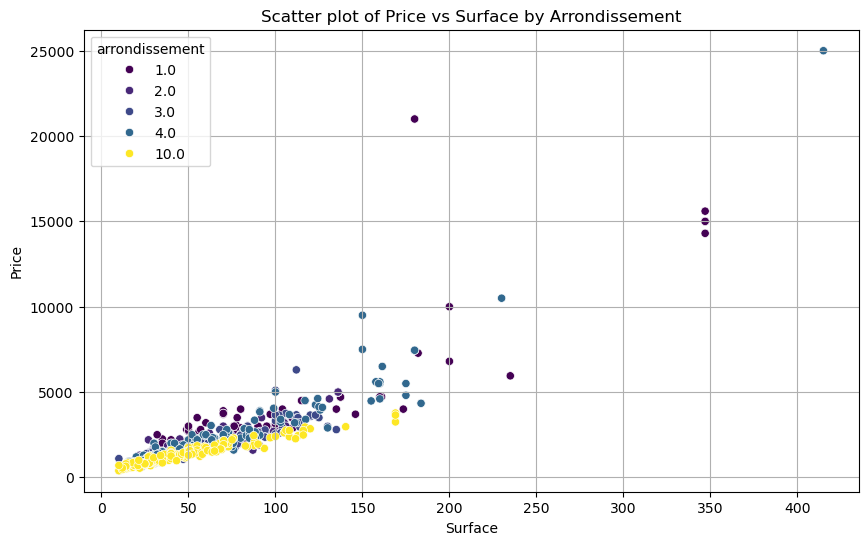

In [34]:
#
# Display the statistical description of the data
print(house_data.describe())

# Plot the data to check for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data, x='surface', y='price', hue='arrondissement', palette='viridis')
plt.title('Scatter plot of Price vs Surface by Arrondissement')
plt.xlabel('Surface')
plt.ylabel('Price')
plt.grid(True)
plt.show()


__Q3.__ Nettoyez les données et ignorez les outliers. Ré-affichez le nuage de points correspondant. Faites-en sorte de pouvoir distinguer les arrondissements.

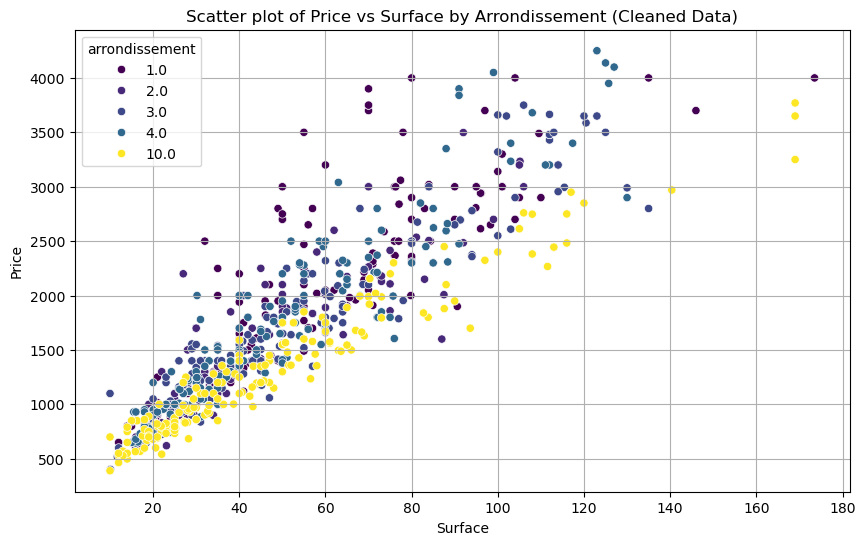

In [35]:
# Calculate the IQR for the 'price' column
Q1 = house_data['price'].quantile(0.25)
Q3 = house_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
house_data_cleaned = house_data[~((house_data['price'] < (Q1 - 1.5 * IQR)) | (house_data['price'] > (Q3 + 1.5 * IQR)))]

# Plot the cleaned data to check for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data_cleaned, x='surface', y='price', hue='arrondissement', palette='viridis')
plt.title('Scatter plot of Price vs Surface by Arrondissement (Cleaned Data)')
plt.xlabel('Surface')
plt.ylabel('Price')
plt.grid(True)
plt.show()

__Q4.__ Représentez la répartition des prix par arrondissement. Est-elle plus ou moins semblable dans les différents arron- dissements ? Où les prix sont-ils le moins élevés ?

/tmp/ipykernel_62841/2878939635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_data_cleaned, x='arrondissement', y='price', palette='viridis')


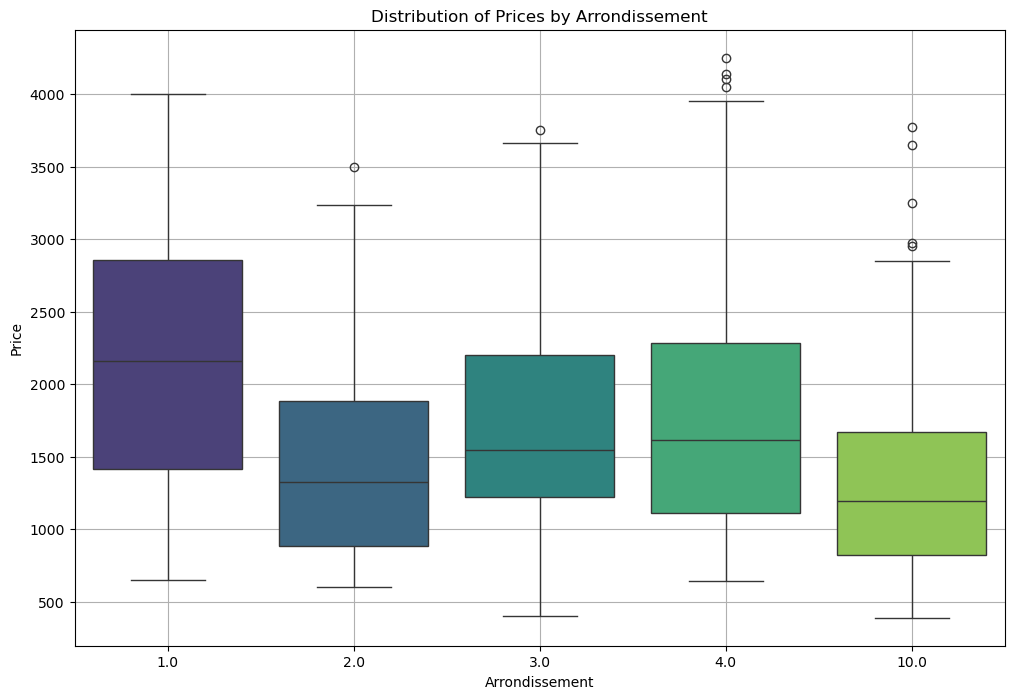

The arrondissement with the lowest median price is: 10.0


In [36]:
# Plot the distribution of prices by arrondissement
plt.figure(figsize=(12, 8))
sns.boxplot(data=house_data_cleaned, x='arrondissement', y='price', palette='viridis')
plt.title('Distribution of Prices by Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Determine where the prices are the lowest
lowest_price_arrondissement = house_data_cleaned.groupby('arrondissement')['price'].median().idxmin()
print(f"The arrondissement with the lowest median price is: {lowest_price_arrondissement}")

__Q5.__ Vaut-il mieux faire un unique modèle de régression commun quelque soit l’arrondissement, ou un modèle différent par arrondissement ?

__Q5.1.__ Afin d’évaluer correctement les modèles, divisez votre jeu de données. Conservez 30% des données pour les tests.

In [37]:
# Separate the features and target variable
X = house_data_cleaned[['surface', 'arrondissement']]
y = house_data_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the number of rows in the training and testing sets
print(f"Number of rows in training set: {X_train.shape[0]}")
print(f"Number of rows in testing set: {X_test.shape[0]}")

Number of rows in training set: 548
Number of rows in testing set: 235


__Q5.2.__ Créez le modèle de régression unique pour l’ensemble des arrondissements. Tracez le et évaluer ses scores. 

R2 score (all arrondissements): 0.79
MSE (all arrondissements): 130006.57
RMSE (all arrondissements): 360.56
MAE (all arrondissements): 248.14


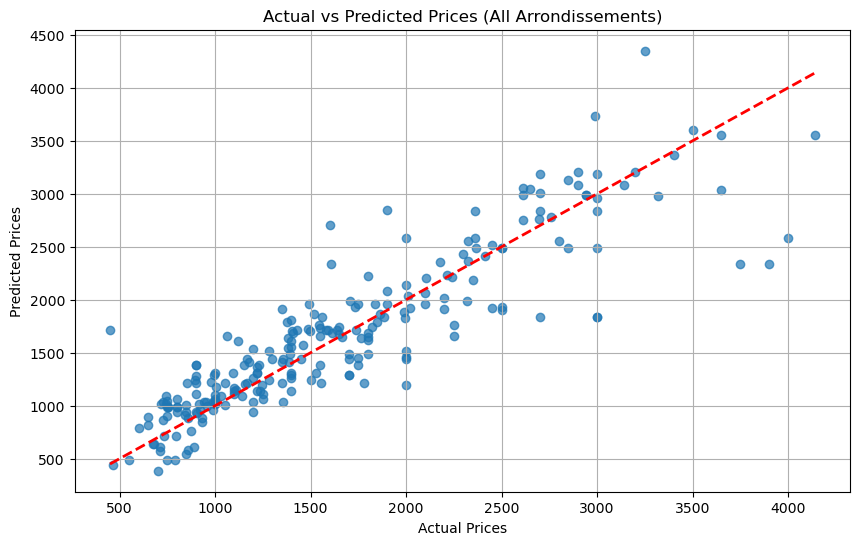

In [40]:
from sklearn.impute import SimpleImputer

# Impute missing values in the training and testing sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit the linear regression model
model_all = LinearRegression()
model_all.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred_all = model_all.predict(X_test_imputed)

# Calculate the R2 score
r2_all = r2_score(y_test, y_pred_all)

# Calculate the Mean Squared Error (MSE)
mse_all = mean_squared_error(y_test, y_pred_all)

# Calculate the Root Mean Squared Error (RMSE)
rmse_all = np.sqrt(mse_all)

# Calculate the Mean Absolute Error (MAE)
mae_all = mean_absolute_error(y_test, y_pred_all)

# Print the scores
print(f"R2 score (all arrondissements): {r2_all:.2f}")
print(f"MSE (all arrondissements): {mse_all:.2f}")
print(f"RMSE (all arrondissements): {rmse_all:.2f}")
print(f"MAE (all arrondissements): {mae_all:.2f}")

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_all, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (All Arrondissements)')
plt.grid(True)
plt.show()

__Q5.3.__ Créez les modèles propres à chaque arrondissement. Tracez-les et évaluer leurs scores.

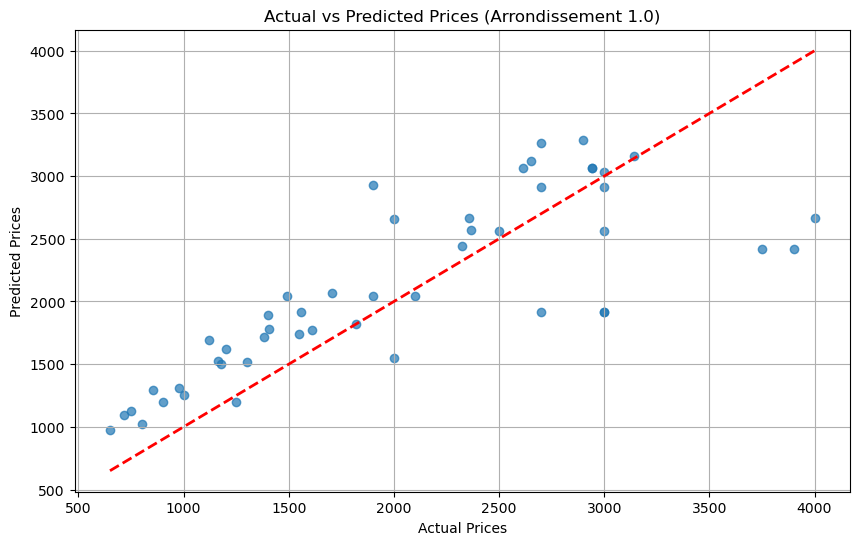

No data available for arrondissement nan in the test set.


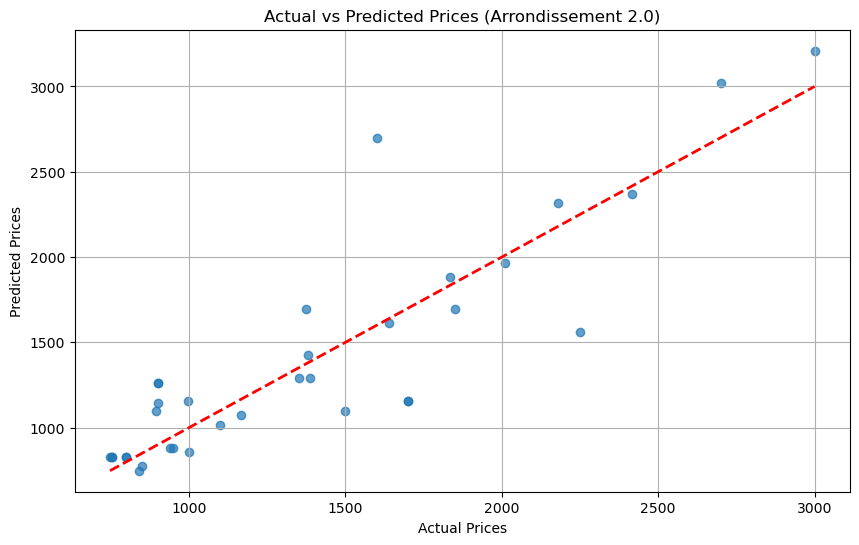

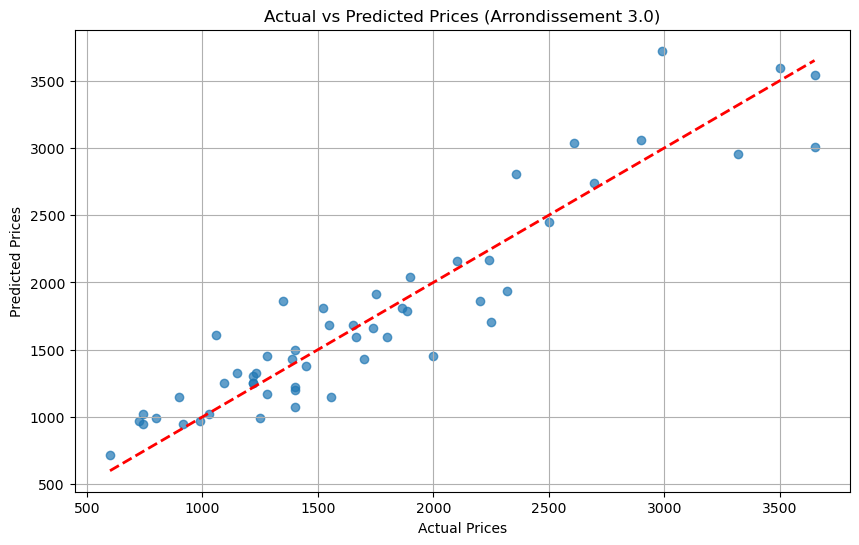

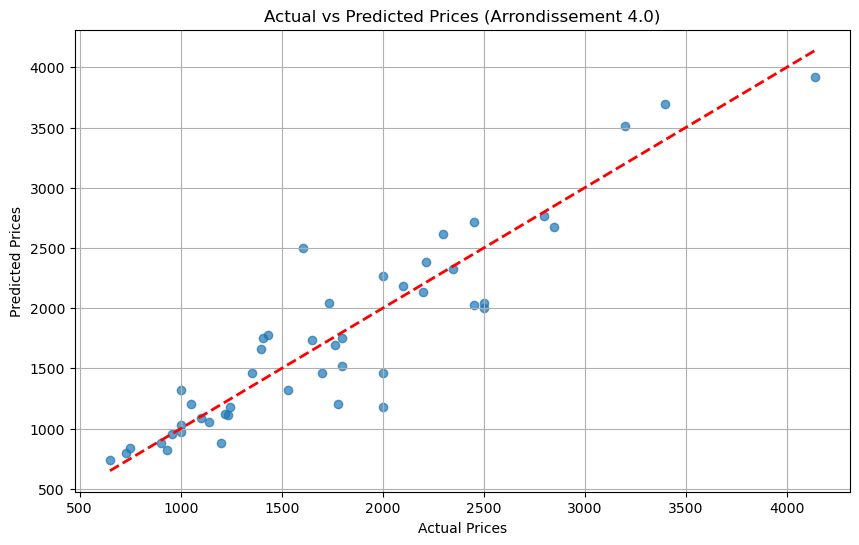

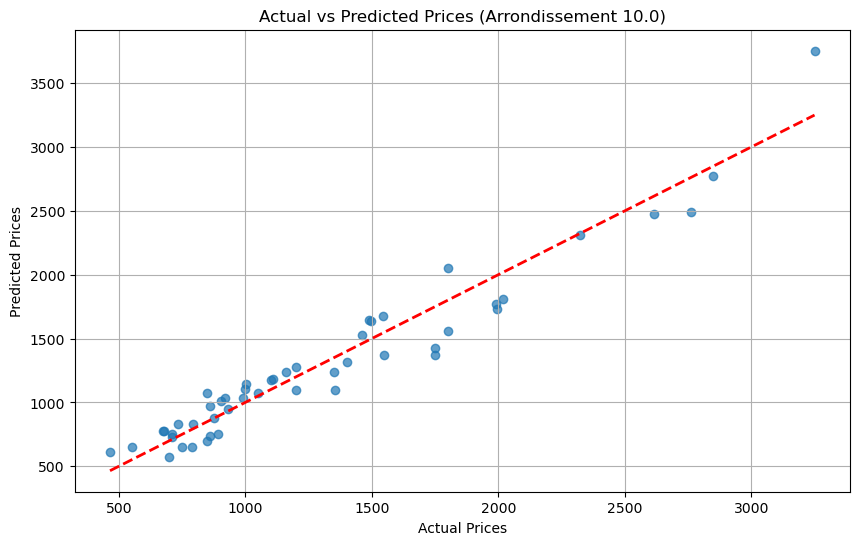

Arrondissement 1.0:
  R2 score: 0.63
  MSE: 297255.60
  RMSE: 545.21
  MAE: 417.06

Arrondissement 2.0:
  R2 score: 0.74
  MSE: 94612.90
  RMSE: 307.59
  MAE: 206.63

Arrondissement 3.0:
  R2 score: 0.87
  MSE: 75037.70
  RMSE: 273.93
  MAE: 210.62

Arrondissement 4.0:
  R2 score: 0.84
  MSE: 91389.28
  RMSE: 302.31
  MAE: 225.30

Arrondissement 10.0:
  R2 score: 0.93
  MSE: 28219.39
  RMSE: 167.99
  MAE: 136.99



In [46]:
# Create a dictionary to store the models and their scores
models_by_arrondissement = {}
scores_by_arrondissement = {}

# Get the unique arrondissements
unique_arrondissements = house_data_cleaned['arrondissement'].unique()

# Loop through each arrondissement
for arrondissement in unique_arrondissements:
  # Filter the data for the current arrondissement
  X_train_arr = X_train[X_train['arrondissement'] == arrondissement][['surface']]
  y_train_arr = y_train[X_train['arrondissement'] == arrondissement]
  X_test_arr = X_test[X_test['arrondissement'] == arrondissement][['surface']]
  y_test_arr = y_test[X_test['arrondissement'] == arrondissement]
  
  if not X_train_arr.empty and not X_test_arr.empty:
    # Impute missing values in the training and testing sets
    X_train_arr_imputed = imputer.fit_transform(X_train_arr)
    X_test_arr_imputed = imputer.transform(X_test_arr)
    
    # Create and fit the linear regression model
    model_arr = LinearRegression()
    model_arr.fit(X_train_arr_imputed, y_train_arr)
    
    # Make predictions on the test set
    y_pred_arr = model_arr.predict(X_test_arr_imputed)
    
    # Calculate the R2 score
    r2_arr = r2_score(y_test_arr, y_pred_arr)
    
    # Calculate the Mean Squared Error (MSE)
    mse_arr = mean_squared_error(y_test_arr, y_pred_arr)
    
    # Calculate the Root Mean Squared Error (RMSE)
    rmse_arr = np.sqrt(mse_arr)
    
    # Calculate the Mean Absolute Error (MAE)
    mae_arr = mean_absolute_error(y_test_arr, y_pred_arr)
    
    # Store the model and scores
    models_by_arrondissement[arrondissement] = model_arr
    scores_by_arrondissement[arrondissement] = {
      'R2': r2_arr,
      'MSE': mse_arr,
      'RMSE': rmse_arr,
      'MAE': mae_arr
    }
    
    # Plot the actual vs predicted prices for the current arrondissement
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_arr, y_pred_arr, alpha=0.7)
    plt.plot([y_test_arr.min(), y_test_arr.max()], [y_test_arr.min(), y_test_arr.max()], 'r--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices (Arrondissement {arrondissement})')
    plt.grid(True)
    plt.show()
  else:
    print(f"No data available for arrondissement {arrondissement} in the test set.")

# Print the scores for each arrondissement
for arrondissement, scores in scores_by_arrondissement.items():
  print(f"Arrondissement {arrondissement}:")
  print(f"  R2 score: {scores['R2']:.2f}")
  print(f"  MSE: {scores['MSE']:.2f}")
  print(f"  RMSE: {scores['RMSE']:.2f}")
  print(f"  MAE: {scores['MAE']:.2f}")
  print()